In [1]:
pip install tensorflow

In [1]:
# Import libraries

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.simplefilter (action = 'ignore')

In [2]:
# Load the Mnist dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("Training set size: ", X_train.shape, y_train.shape)

Training set size:  (60000, 28, 28) (60000,)


In [4]:
print("Test set size: ", X_test.shape, y_test.shape)

Test set size:  (10000, 28, 28) (10000,)


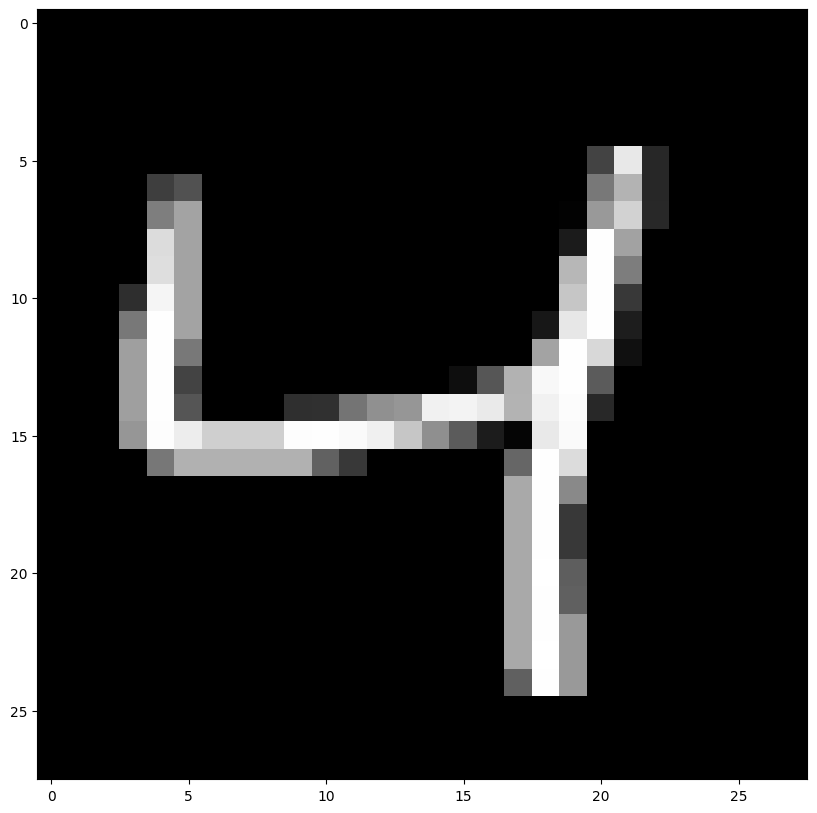

In [5]:
# Random samples from the dataset

plt.figure(figsize=(10,10))
plt.imshow(X_train[2], cmap='gray');

In [6]:
# Function for random samples from dataset

def visualize_img(data):
  plt.figure(figsize=(10,10))
  for n in range(10):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(data[n], cmap='gray')
    plt.axis('off')

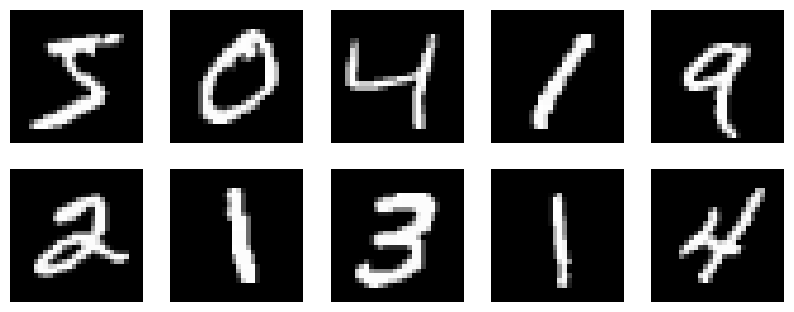

In [7]:
visualize_img(X_train)

In [8]:
# Function to visualize data with numeric RGB values

def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
  width, height = img.shape

  threshold = img.max() / 2.5

  for x in range(width):
    for y in range(height):

      ax.annotate(str(round(img[x][y], 2)), xy=(y,x),
                  color='white' if img[x][y]<threshold else 'black')

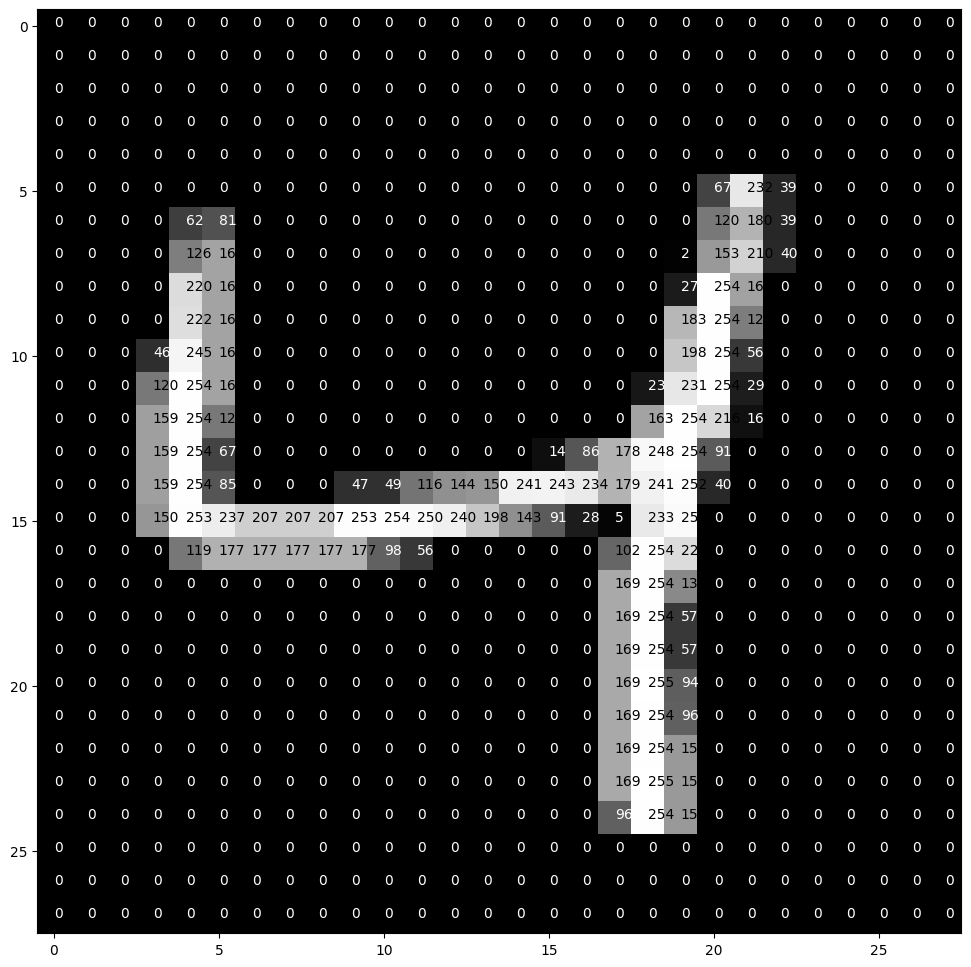

In [9]:
pixel_visualize(X_train[2])

# Data Preparation

## Encoding

In [10]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
# One-Hot Encoding

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## Reshaping

In [13]:
image_size = X_train.shape[1]

In [14]:
image_size

28

In [15]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(f"X_train size: {X_train.shape}")
print(f"X_test size: {X_test.shape}")

X_train size: (60000, 28, 28, 1)
X_test size: (10000, 28, 28, 1)


## Standardization





In [16]:
X_train = X_train.astype('float32') / 255

X_test =  X_test.astype('float32') / 255

# Modeling

## Describing Neural Network Architecture

In [17]:
num_labels = 10

model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(units=128, activation='relu', name='layer1'),
    Dense(units=num_labels, activation='softmax', name='output_layer')
])


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8204 - loss: 0.6449 - precision: 0.9256 - recall: 0.6885 - val_accuracy: 0.9444 - val_loss: 0.1906 - val_precision: 0.9575 - val_recall: 0.9317
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9503 - loss: 0.1773 - precision: 0.9631 - recall: 0.9385 - val_accuracy: 0.9611 - val_loss: 0.1338 - val_precision: 0.9693 - val_recall: 0.9534
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9657 - loss: 0.1220 - precision: 0.9741 - recall: 0.9580 - val_accuracy: 0.9669 - val_loss: 0.1131 - val_precision: 0.9732 - val_recall: 0.9607
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9736 - loss: 0.0932 - precision: 0.9793 - recall: 0.9687 - val_accuracy: 0.9711 - val_loss: 0.0978 - val_precision: 0.9760 - val_recall: 0.9663
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9791 - loss: 0.0748 - precision: 0.9830 - recall: 0.9751 - val_accuracy: 0.9739 - val_loss: 0.

# Evaluation

In [20]:
history=model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9937 - loss: 0.0246 - precision: 0.9948 - recall: 0.9925 - val_accuracy: 0.9779 - val_loss: 0.0749 - val_precision: 0.9795 - val_recall: 0.9769
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9951 - loss: 0.0215 - precision: 0.9958 - recall: 0.9939 - val_accuracy: 0.9785 - val_loss: 0.0731 - val_precision: 0.9799 - val_recall: 0.9774
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9964 - loss: 0.0170 - precision: 0.9967 - recall: 0.9954 - val_accuracy: 0.9782 - val_loss: 0.0753 - val_precision: 0.9805 - val_recall: 0.9768
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9970 - loss: 0.0149 - precision: 0.9976 - recall: 0.9963 - val_accuracy: 0.9776 - val_loss: 0.0770 - val_precision: 0.9795 - val_recall: 0.9765
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9977 - loss: 0.0120 - precision: 0.9980 - recall: 0.9974 - val_accuracy: 0.9785 - val_loss: 0.

# Accuracy and Loss Graphs

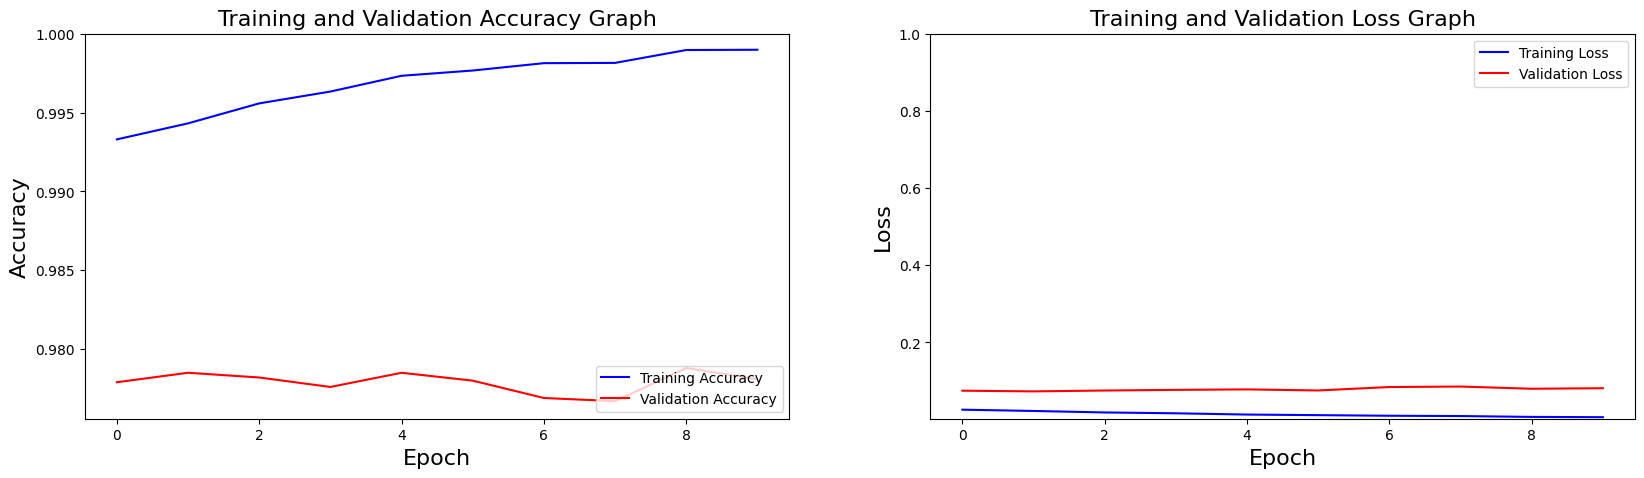

In [21]:
#Accuracy Graph

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy Graph', fontsize=16)


#Loss Graph

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Loss Graph', fontsize=16)
plt.show()

In [22]:
loss, precision, recall, acc = model.evaluate(X_test, y_test, verbose=False)
print("\n Test Accuracuy: %1.f%%" % (100.0 * acc))
print("\n Test Loss: %1.f%%" % (100.0 * loss))
print("\n Test Precision: %1.f%%" % (100.0 * precision))
print("\n Test Recall: %1.f%%" % (100.0 * recall))


 Test Accuracuy: 98%

 Test Loss: 8%

 Test Precision: 98%

 Test Recall: 98%


# Saving and Using the Model for Prediction

In [24]:
model.save('mnist_model.keras')

In [25]:
import random

random = random.randint(0, X_test.shape[0])

In [26]:
random

55

In [27]:
test_image = X_test[random]

In [28]:
y_test[random]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

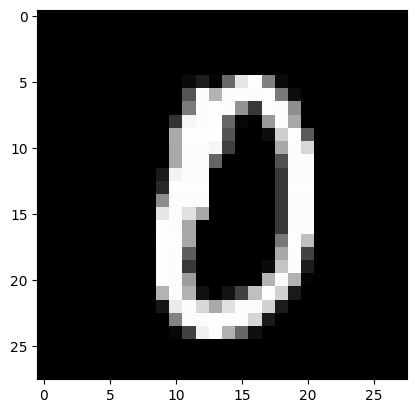

In [29]:
plt.imshow(test_image.reshape(28,28), cmap='gray')

In [30]:
test_data = X_test[random].reshape(1,28,28,1)

In [31]:
probability = model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [32]:
probability

array([[9.99998927e-01, 1.02632624e-13, 4.38900152e-08, 2.41311887e-10,
        7.30342002e-12, 1.09217968e-08, 4.00153262e-08, 1.38910961e-09,
        9.74177738e-07, 1.45665965e-10]], dtype=float32)

In [33]:
predicted_classes = np.argmax(probability)

In [34]:
predicted_classes

0

In [35]:
print(f"Predicted Class: {predicted_classes} \n")
print(f"Predicted class probability: {(np.max(probability, axis=-1))[0]} \n")
print(f"Probabilities of the other classes: \n{probability}")

Predicted Class: 0 

Predicted class probability: 0.999998927116394 

Probabilities of the other classes: 
[[9.99998927e-01 1.02632624e-13 4.38900152e-08 2.41311887e-10
  7.30342002e-12 1.09217968e-08 4.00153262e-08 1.38910961e-09
  9.74177738e-07 1.45665965e-10]]
